In [209]:

import numpy as  np
import pandas as pd

import matplotlib 

from matplotlib import pyplot as plt
plt.style.use(['science','ieee',"no-latex"])
import math

In [92]:

y_train = pd.read_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/DAX/Dataframes/ytrain")
x_train = pd.read_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/DAX/Dataframes/xtrain")
y_test = pd.read_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/DAX/Dataframes/ytest")
x_test = pd.read_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/DAX/Dataframes/xtest")

In [93]:
y_test = pd.read_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/xy_test_data/dax_only/y_test")

In [94]:
#quantile score
def quantile_score_2(q,y,f):
    if f>y:
        score = 2*(1-q)*(f-y)
    else:
        score = 2*q*(y-f) 
    return score      

def s(y,q):
    return y

def h(y,q): 
    return (-y)*q

def one(y,f):
    if y<=f:
        return 1
    else:
        return 0

def quantile_score(q,y,f,scale=2):
    return abs(scale*(q*s(f,q)+(s(y,q)-s(f,q))*one(y,f)+h(y,q)))


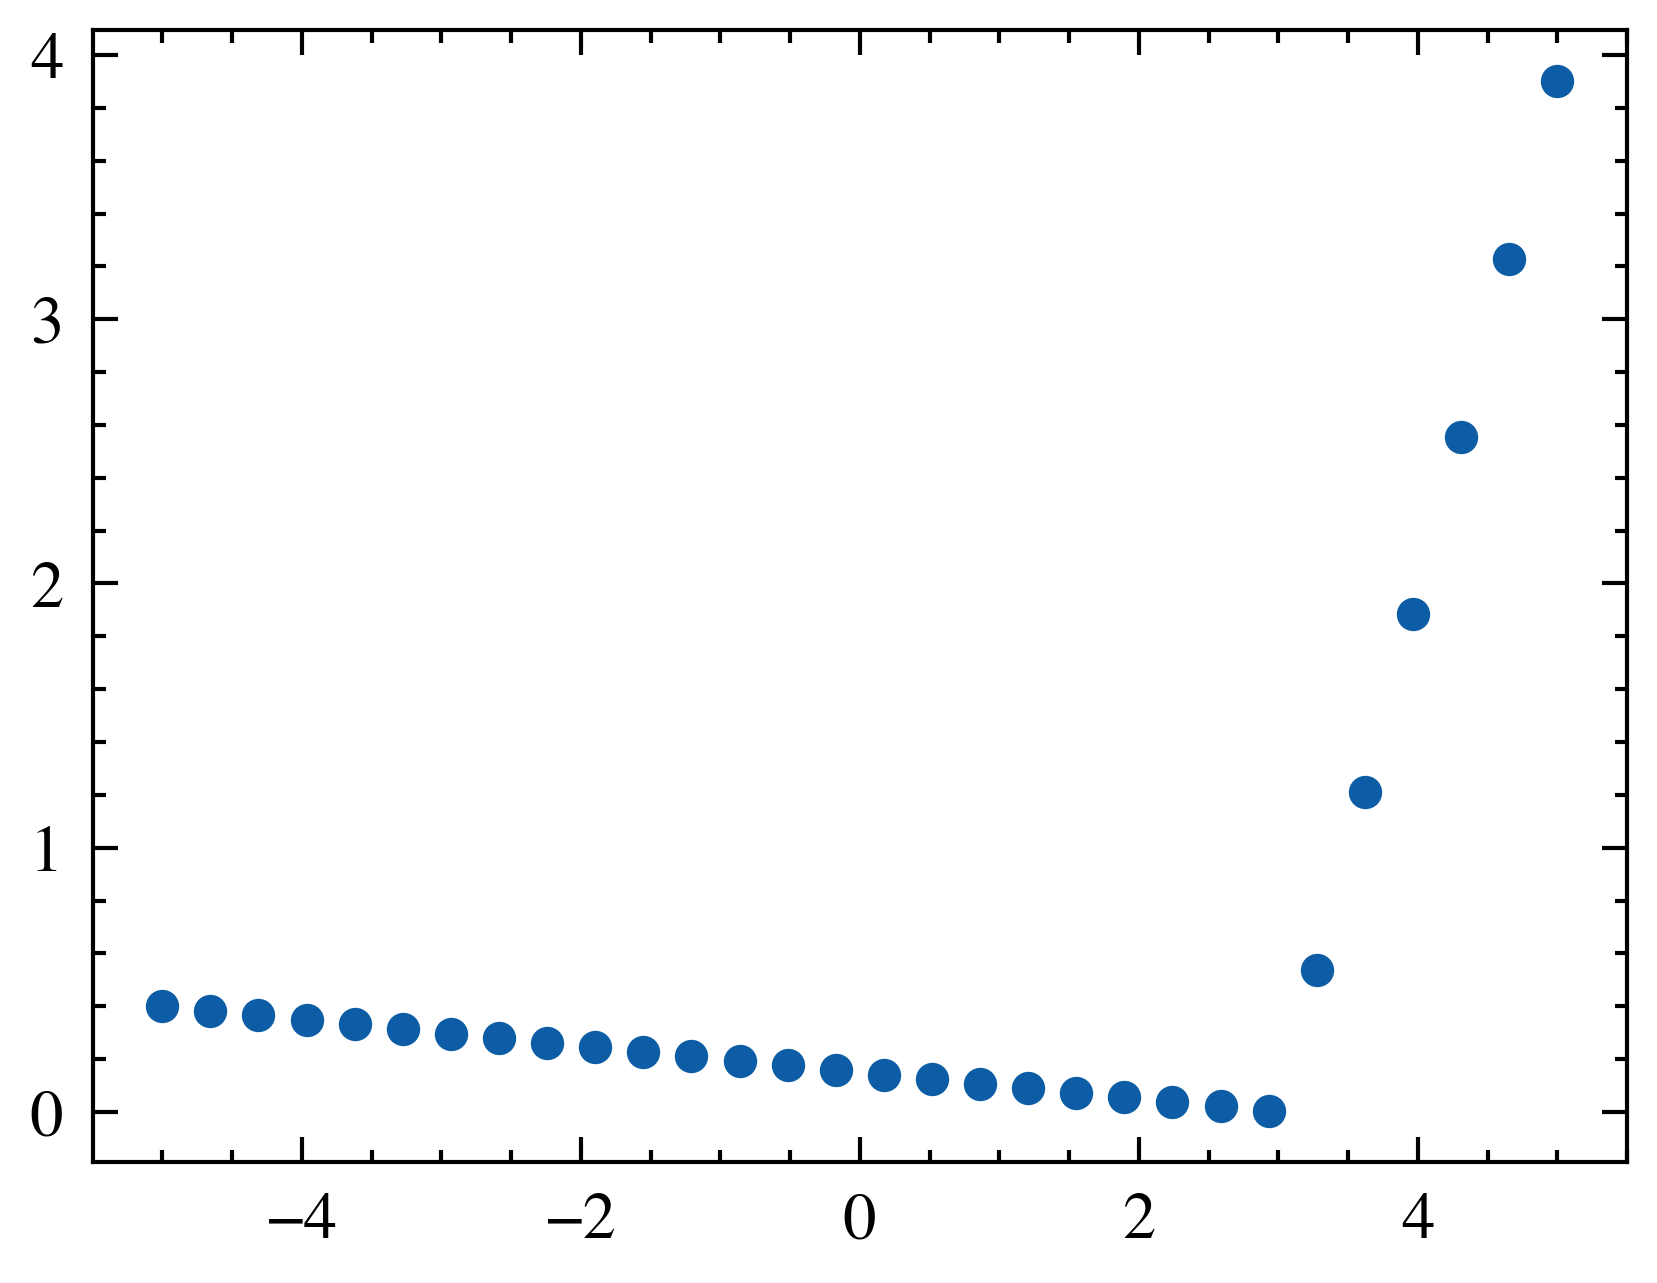

In [95]:
f = np.linspace(-5,5,30)
losses = []
q = 0.025
y = 3
#quantile_score(q,y,f)
for i in f:
   losses.append(quantile_score(q,y,i))

plt.plot(f,losses)


            

In [96]:
a = 9
b = 4
print(quantile_score_2(0.025,a,b))
print(quantile_score(0.025,a,b))

0.25
0.25


In [144]:
results_gb_df =  pd.read_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/VIX and 5 Days/model1")
model_name = "model1"
model_name_fig = "GB Model with 1-day-return of t-1"

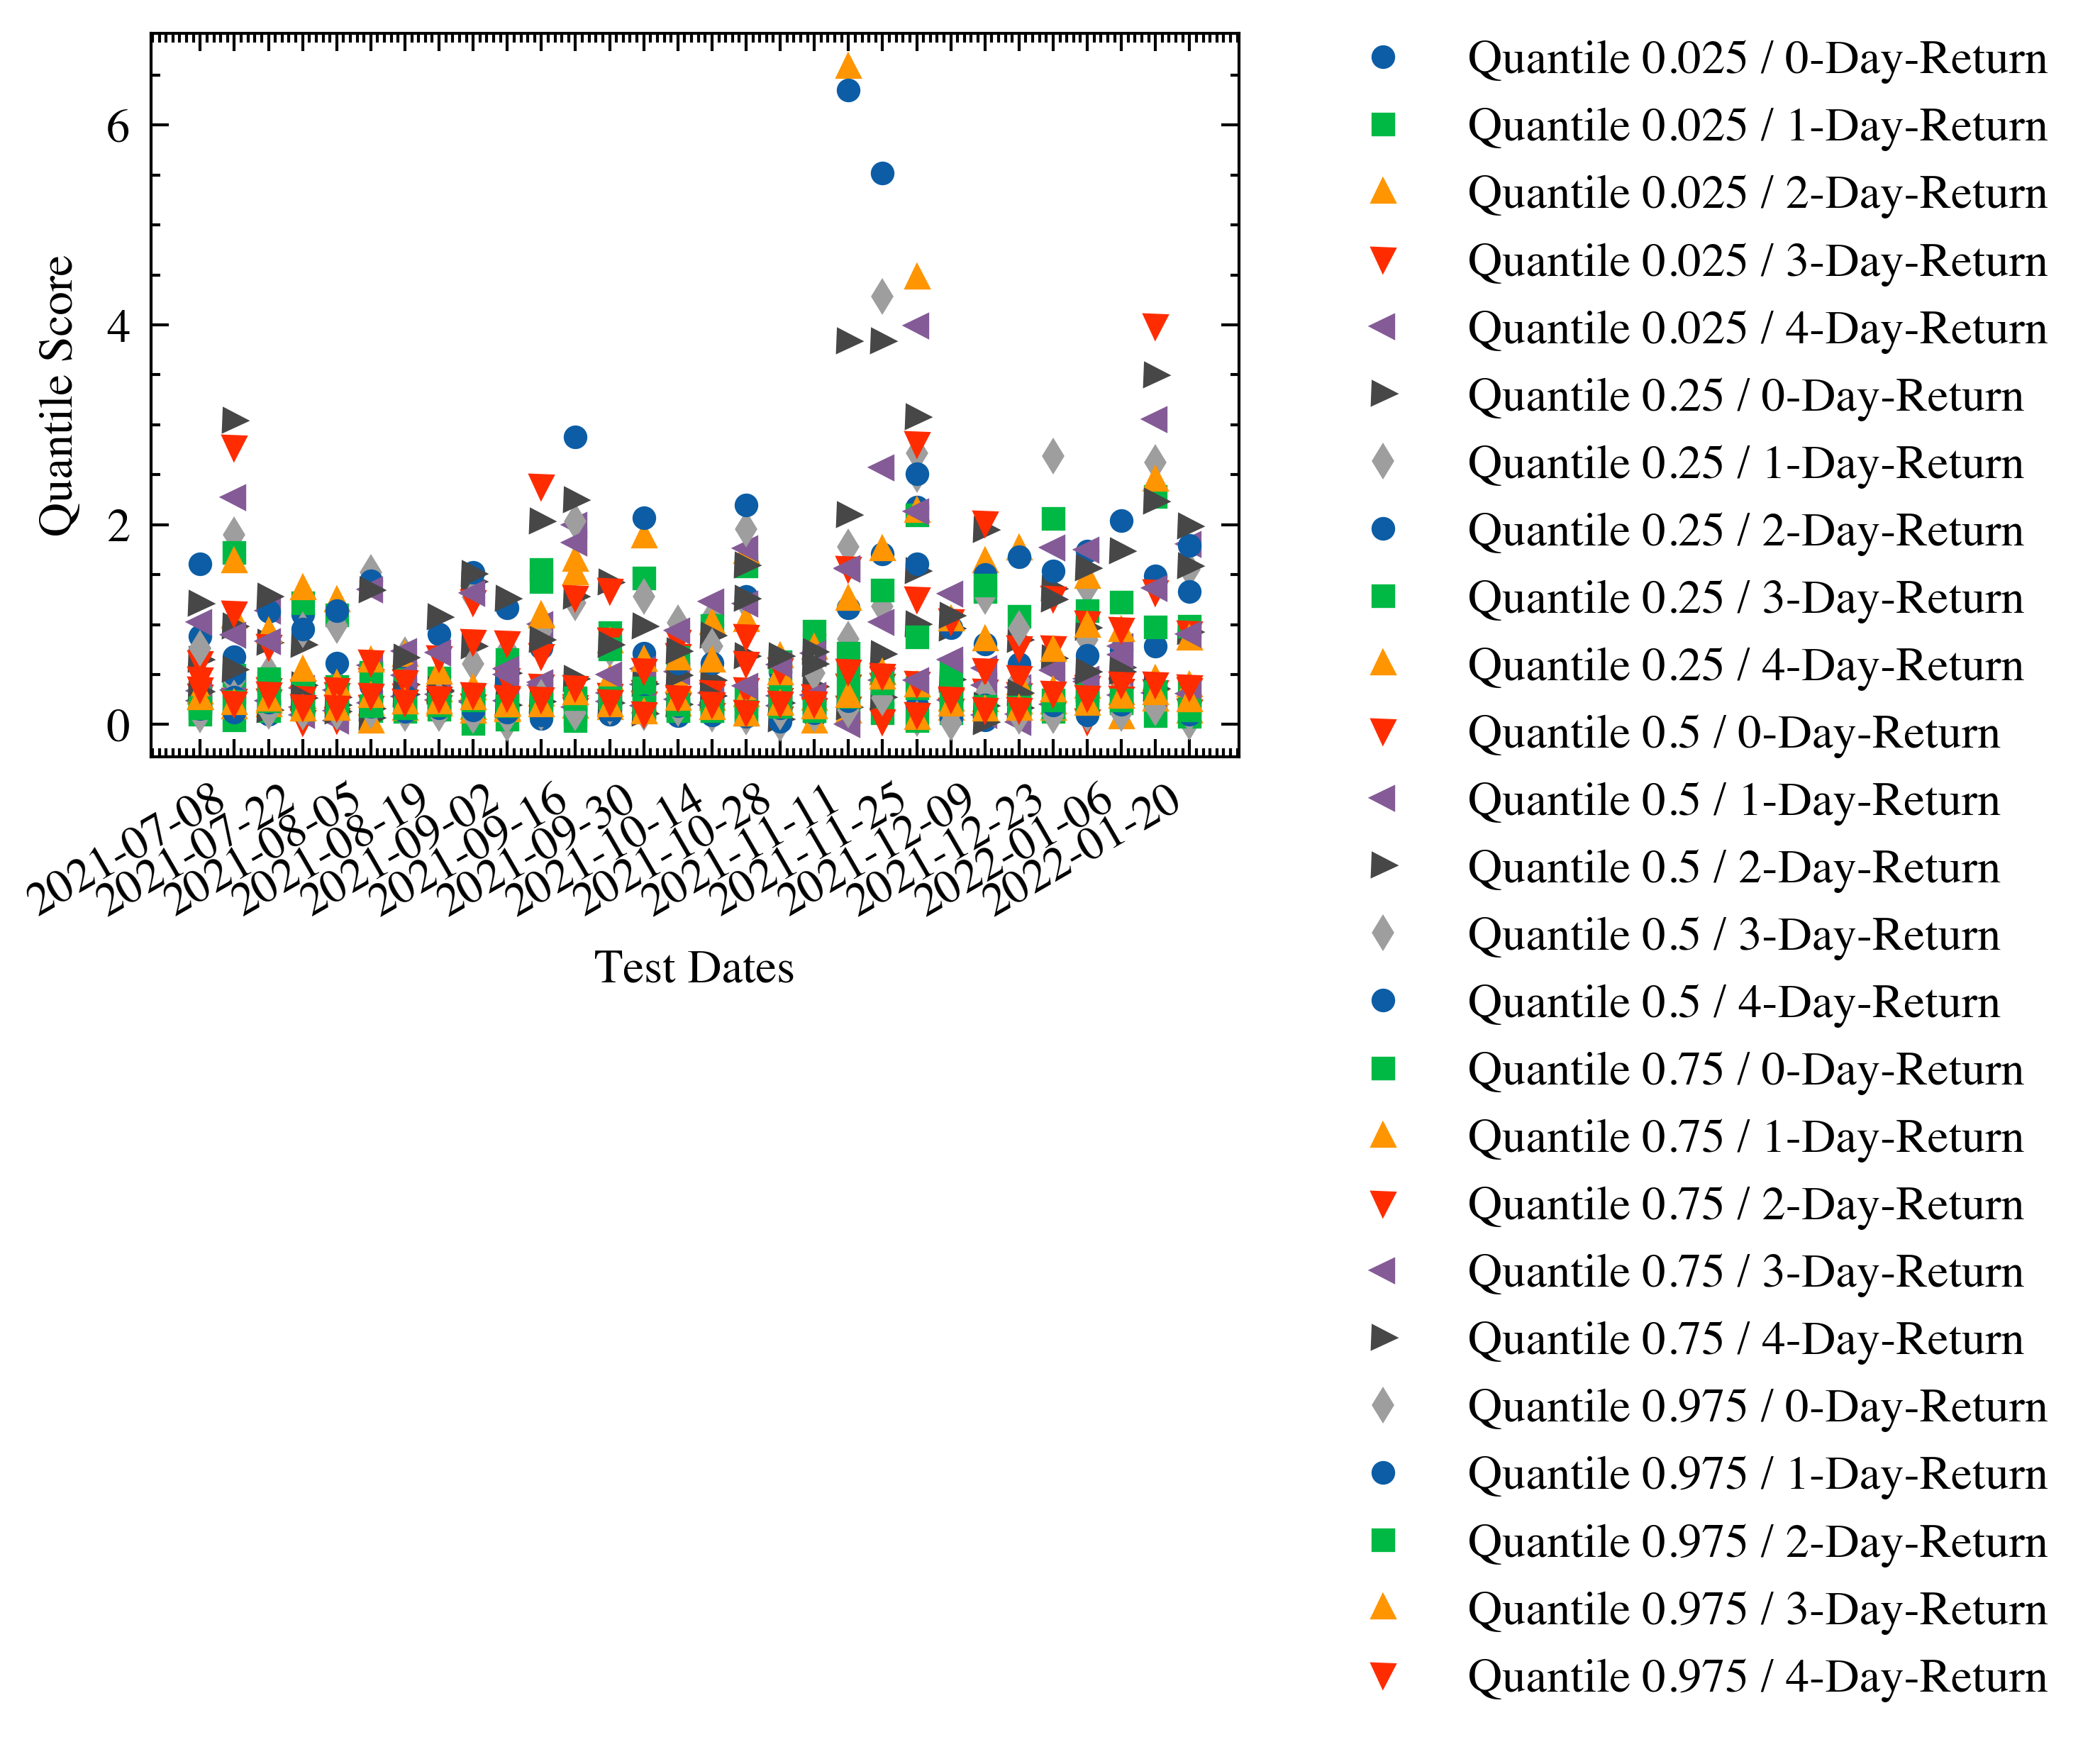

In [184]:
q = 0
r =4
d = 0
quantiles = [0.025,0.25,0.5,0.75,0.975]
results_gb_df.iloc[r,q][d]
y_test.iloc[d,r]
scores = []
sums = []
scores_q =[] 
sums_r =  []
handles = []

fig = plt.figure()
ax = plt.subplot(111)

"""for i in xrange(5):
    ax.plot(x, i * x, label='$y = %ix$'%i)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis"""

ax = plt.gca()
for q in range(0,5):
    
    for r in range(0,5):
        scores_q = []
        for d  in range (0,len(y_test)):

            scores_q.append(quantile_score(quantiles[q],y_test.iloc[d,r],results_gb_df.iloc[r,q][d]))
        sums_r.append(np.nansum(scores_q))
        
        plt.plot(y_test.index,scores_q)
        current_figure = plt.gcf()
         
        current_figure.autofmt_xdate()
        
        #plt.title(f"GB Model based on {model_name_fig}")
        handles.append(f"Quantile {quantiles[q]} / {r}-Day-Return ")
        plt.xlabel("Test Dates")
        plt.ylabel("Quantile Score")
        
            
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)  

plt.legend(handles,bbox_to_anchor = (1.05, 1.05))

plt.savefig(f"/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/figures/{model_name}_woCaption")



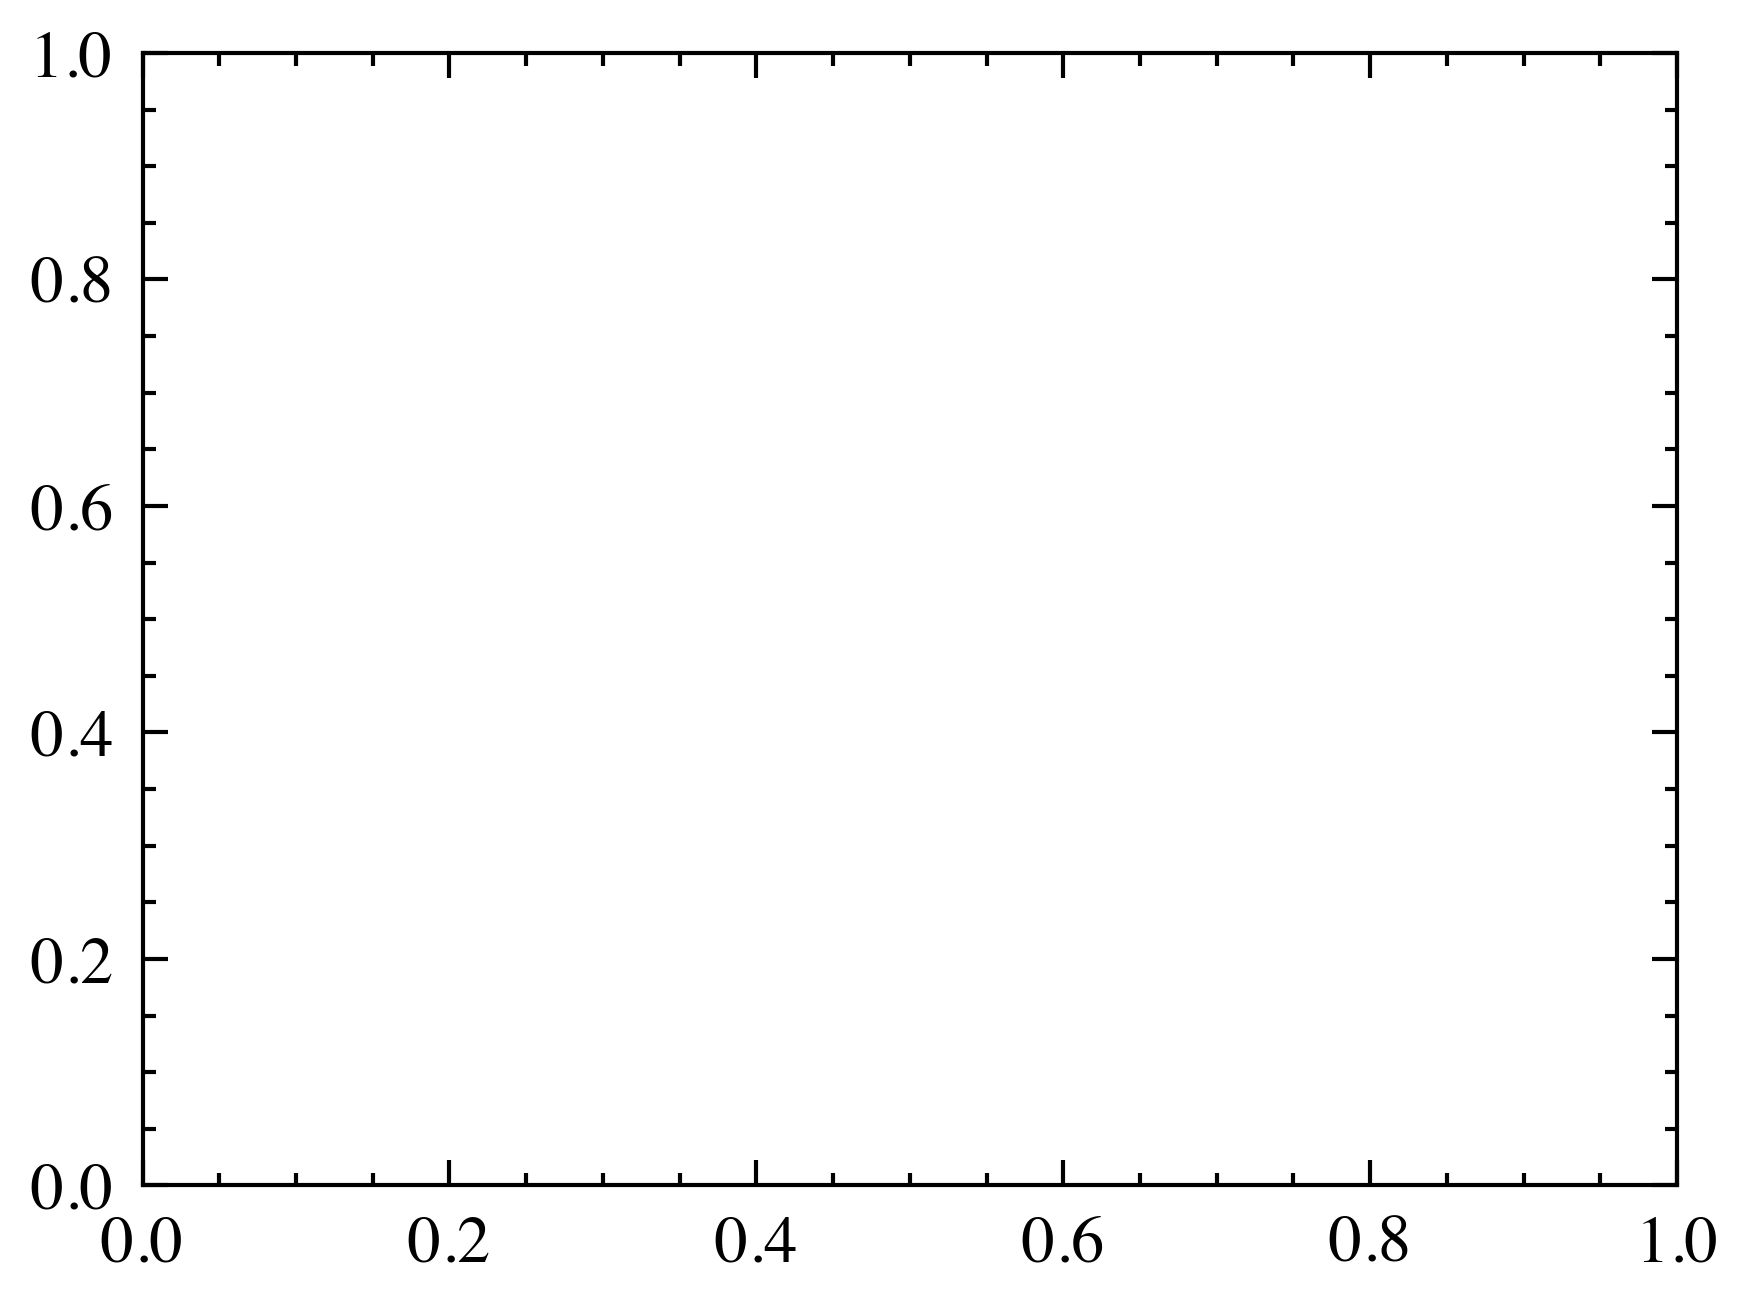

In [180]:
plt.legend(handles)

In [146]:
sums_r
Sum_Quantile_scores = np.array(sums_r).reshape(-1,5)
Sum_Quantile_scores = pd.DataFrame(Sum_Quantile_scores,index=["1Day Return","2Day Return","3Day Return","4Day Return","5Day Return"],columns=quantiles)

In [147]:
Sum_Quantile_scores["Sum"] = Sum_Quantile_scores.sum(axis=1)
Sum_Quantile_scores.loc['Total']= Sum_Quantile_scores.sum()

In [159]:
Sum_Quantile_scores.to_pickle(f"/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Dataframes_ges/{model_name}_qs")

In [156]:
with open(f'/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Latex/{model_name}_qs.tex.tex', 'w') as tf:
     tf.write(Sum_Quantile_scores.to_latex(caption=(f"Quantile Scores","Quantile Scores for 1-5 Day Returns and quantiles 0.025, 0.25, 0.5, 0.75, 0.975 of {model_name_fig}}"), label="Quantile Scores of Model prediction with VIX Data [5 Day input]"))

In [150]:
Sum_Quantile_scores

,0.025,0.25,0.5,0.75,0.975,Sum
1Day Return,4.885409,5.499050,7.432088,8.500949,9.108354,35.425849
2Day Return,23.266134,24.217256,22.198511,25.979582,30.949764,126.611247
3Day Return,23.201417,30.542702,24.631855,30.787377,45.436223,154.599574
4Day Return,16.407916,28.125111,23.690615,26.235875,36.108457,130.567974
5Day Return,4.160419,6.977314,6.094589,6.715437,8.100818,32.048576
Total,71.921296,95.361432,84.047658,98.219219,129.703616,479.253221


In [151]:
results_gb_df

,0,1,2,3,4
0,"[-2.5104666400225173, -2.307842328479876, -2.4...","[-0.644021043311201, -0.6251979451799896, -0.6...","[0.03295009270718047, 0.12222545940560273, 0.0...","[0.8537858878564462, 0.7814323367775586, 0.592...","[2.578814678362968, 2.6169368363203276, 2.2341..."
1,"[-3.8712300362632392, -3.091738278732766, -3.7...","[-0.8747761855874194, -0.8405560332588997, -0....","[0.40642700010060623, 0.1675156986046928, 0.17...","[1.297261407879033, 1.1715827243937427, 0.9030...","[3.8506654050018563, 3.3337955103541006, 3.467..."
2,"[-4.740814093658917, -4.251022348901772, -4.46...","[-1.12088754000838, -1.0039879015483244, -1.04...","[0.31440139315297877, 0.22288070496551007, 0.1...","[1.5537376709227897, 1.4768516735510127, 0.936...","[3.9987522086126264, 3.8646237326018467, 4.088..."
3,"[-6.167553178458336, -5.021221478270357, -4.90...","[-0.8923553088442532, -1.148588229080591, -1.0...","[0.3925228069592936, 0.2689539840492398, 0.336...","[1.681942095808698, 1.6262811927816203, 1.4839...","[4.9221661499398675, 4.208020124280189, 4.8596..."
4,"[-7.6504773710054454, -5.98413367699516, -5.53...","[-0.7644985721758736, -1.3419955464745255, -1....","[0.66490979178127, 0.32066493343500935, 0.3336...","[1.4691617685591543, 1.9198109535494765, 1.762...","[6.273559465136669, 5.1615084379236045, 5.4196..."


In [152]:
y_test

,1Day Return,2Day Return,3Day Return,4Day Return,5Day Return
2021-07-01,0.651750,0.646240,0.642065,-0.372121,-0.945434
2021-07-08,-2.654625,-2.107205,-0.760978,-0.165961,0.826548
2021-07-15,-0.321588,-0.962930,-0.633362,-0.184098,-0.800297
2021-07-22,0.156467,0.068750,0.945953,1.280211,1.386732
2021-07-29,-0.101819,0.058732,0.409274,1.110834,1.361066
2021-08-05,-0.324168,-0.347908,-0.071819,-1.333411,-1.065908
2021-08-12,0.282684,0.616827,0.332317,-0.091261,0.276123
2021-08-19,0.224075,-0.105155,-0.173380,-0.070428,-0.446053
2021-08-26,0.951783,0.391406,-1.088968,-1.006556,-1.091984
2021-09-02,0.585161,0.722445,0.039649,0.268320,-0.769391


In [153]:

def in_between(lower,upper,y):
    if (y<=upper)&(y>=lower):
        return 1
    else:
        return 0



In [154]:


small_sum = []
big_sum = []
for r in range(0,5):
    small_values = []
    big_values = []
    for d in range(0,29):
        #50%
        small_values.append(in_between(results_gb_df.iloc[r,1][d],results_gb_df.iloc[r,3][d],y_test.iloc[d,r]))
        #95%
        
        big_values.append(in_between(results_gb_df.iloc[r,0][d],results_gb_df.iloc[r,4][d],y_test.iloc[d,r]))
    small_sum.append(np.array(small_values).mean())
    big_sum.append(np.array(big_values).mean())
means = [small_sum,big_sum]
means = np.array(means)
means.T
coverage_ratio_df = pd.DataFrame(means.T,index=["1Day Return","2Day Return","3Day Return","4Day Return","5Day Return"],columns=["50% Range","95% Range"])

coverage_ratio_df.loc['Total']= coverage_ratio_df.mean()
coverage_ratio_df

,50% Range,95% Range
1Day Return,0.586207,0.931034
2Day Return,0.620690,0.965517
3Day Return,0.793103,1.000000
4Day Return,0.793103,1.000000
5Day Return,0.689655,1.000000
Total,0.696552,0.979310


In [160]:
coverage_ratio_df.to_pickle(f"/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Dataframes_ges/{model_name}_cr")
with open(f'/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Latex/{model_name}_cr.tex', 'w') as tf:
     tf.write(coverage_ratio_df.to_latex(caption=(f"Coverage Ratio","Coverage Ratio for 50 percent and 95 percent of {model_name_fig}}"), label="Coverage Ratio"))


In [161]:
Sum_Quantile_scores

,0.025,0.25,0.5,0.75,0.975,Sum
1Day Return,4.885409,5.499050,7.432088,8.500949,9.108354,35.425849
2Day Return,23.266134,24.217256,22.198511,25.979582,30.949764,126.611247
3Day Return,23.201417,30.542702,24.631855,30.787377,45.436223,154.599574
4Day Return,16.407916,28.125111,23.690615,26.235875,36.108457,130.567974
5Day Return,4.160419,6.977314,6.094589,6.715437,8.100818,32.048576
Total,71.921296,95.361432,84.047658,98.219219,129.703616,479.253221


In [110]:

coverage_ratio_df


,50% Range,95% Range
1Day Return,0.586207,0.931034
2Day Return,0.586207,0.965517
3Day Return,0.724138,1.000000
4Day Return,0.724138,1.000000
5Day Return,0.586207,0.965517
Total,0.641379,0.972414


In [111]:
model_1 = pd.read_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/tables/DataFrames/1_Day_Return_last5_days_covRat")

In [113]:
model_1

,0.025,0.25,0.5,0.75,0.975,Sum
1Day Return,5.359260,5.073204,6.484412,7.147968,9.053833,33.118677
2Day Return,23.923311,23.872852,20.153739,25.846046,30.908755,124.704703
3Day Return,23.546114,31.193463,25.213446,28.776264,43.466117,152.195403
4Day Return,16.993273,26.751966,23.557460,25.214584,35.877960,128.395244
5Day Return,3.511037,6.965478,5.047336,5.701314,6.750273,27.975439
Total,73.332995,93.856963,80.456393,92.686176,126.056938,466.389466


In [162]:
results = []
index = []
for i in range(0,6):
    index.append(f"Model {i}")
    model_1 = pd.read_pickle(f"/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Dataframes_ges/model{i}_qs")
    results.append(model_1["Sum"])

In [163]:
index[index =="Model 0"] = "Benchmark"

In [164]:
quantile_scores =pd.DataFrame(results, index=index)
quantile_scores.to_latex("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Latex/gesamt_qs")

In [175]:
quantile_scores['rank'] = quantile_scores['Total'].rank(method='min')
quantile_scores.to_latex("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Latex/gesamt_qs.tex")
quantile_scores.to_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Dataframes_ges/gesamt_qs")
quantile_scores

,1Day Return,2Day Return,3Day Return,4Day Return,5Day Return,Total,rank
Benchmark,33.666690,147.998510,163.592871,127.099974,32.923858,505.281903,6.0
Model 1,35.425849,126.611247,154.599574,130.567974,32.048576,479.253221,4.0
Model 2,36.618631,128.603395,150.867539,115.613721,24.630499,456.333786,1.0
Model 3,33.118677,124.704703,152.195403,128.395244,27.975439,466.389466,2.0
Model 4,37.536604,129.652761,150.149249,137.172256,30.162635,484.673505,5.0
Model 5,38.380818,131.039547,148.574033,128.405368,29.422737,475.822504,3.0


In [193]:
coverage_ratios['50% Range'].

.rank(axis=0,method='min')

Benchmark    100.0
Model 1      500.0
Model 2      200.0
Model 3      300.0
Model 4      600.0
Model 5      400.0
Name: 50% Range, dtype: float64

In [204]:
results = []
index = []
for i in range(0,6):
    index.append(f"Model {i}")
    model_1 = pd.read_pickle(f"/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Dataframes_ges/model{i}_cr")
    results.append(model_1.loc["Total"])
index[index =="Model 0"] = "Benchmark"

coverage_ratios =pd.DataFrame(results, index=index)

coverage_ratios['rank 50%'] = coverage_ratios['50% Range'].rank(axis=0,method='min',ascending=False)
coverage_ratios['rank 95%'] = coverage_ratios['95% Range'].rank(method='average',ascending=False)
index[index =="Model 0"] = "Benchmark"

coverage_ratios.to_latex("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Latex/gesamt_cr.tex")
coverage_ratios.to_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Dataframes_ges/gesamt_cr")

coverage_ratios

,50% Range,95% Range,rank 50%,rank 95%
Benchmark,0.620690,0.979310,6.0,2.5
Model 1,0.696552,0.979310,2.0,2.5
Model 2,0.627586,0.965517,5.0,6.0
Model 3,0.641379,0.972414,4.0,5.0
Model 4,0.717241,0.979310,1.0,2.5
Model 5,0.668966,0.979310,3.0,2.5


In [168]:
model_1 = pd.read_pickle(f"/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/Gesamtauswertung/Dataframes_ges/model{i}_cr")
model_1.loc["Total"]
coverage_ratios =pd.DataFrame(results, index=index)

50% Range    0.668966
95% Range    0.979310
Name: Total, dtype: float64

In [205]:
def quantile_loss(q, y, f):
    # q: Quantile to be evaluated, e.g., 0.5 for median.
    # y: True value.
    # f: Fitted or predicted value.
    e = y - f
    return np.maximum(q * e, (q - 1) * e)

In [207]:
f = np.linspace(-2,4,30)

loss = [quantile_loss(0.2,1,f1) for f1 in f]




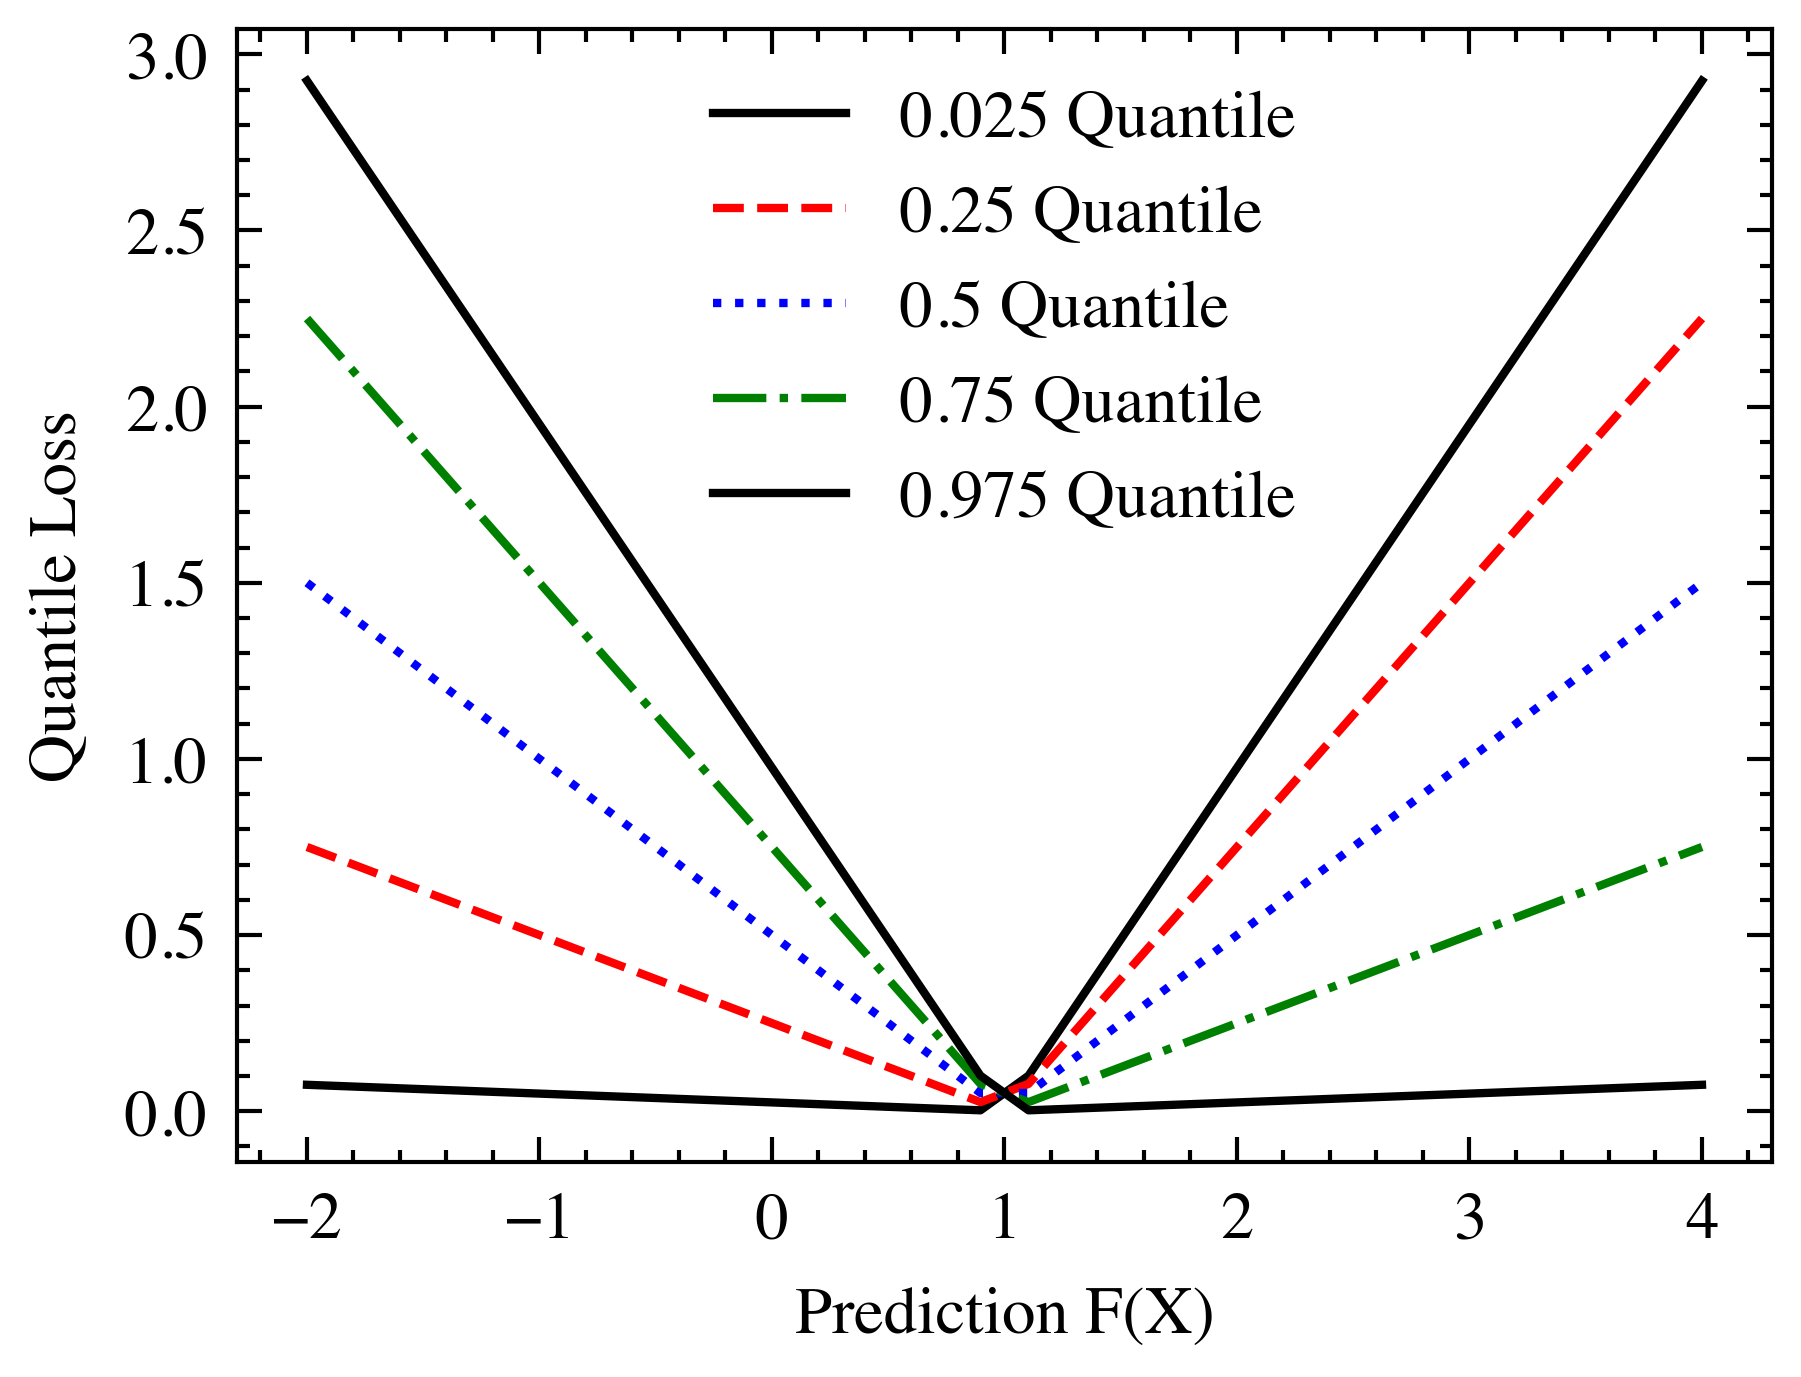

In [213]:
legend = []
for q in quantiles:
    loss = [quantile_loss(q,1,f1) for f1 in f]
    plt.plot(f,loss)
    legend.append(f"{q} Quantile")
    plt.xlabel("Prediction F(X)")
    plt.ylabel("Quantile Loss")
plt.legend(legend)    